In [177]:
import math
import scipy.stats as sts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Распределение $\chi^2$

Распределение на wiki: https://ru.wikipedia.org/wiki/Распределение_хи-квадрат

1. Создадим переменную распределения $\chi^2$ с параметром - число степеней свободы ```df```, равным $\text{df}=15$

In [162]:
chi2_dist = sts.chi2(10)

2. Командой ```rvs``` сгенерируем выборку (массив) из распределения $\chi^2$ объемом $n=1000$

In [163]:
sample = chi2_dist.rvs(1000)

3. Подадим массив в функцию ```hist``` библиотеки ```matplotlib```, чтобы построить гистограмму. Чтобы совместить масштаб гистограммы и плотности зададим параметр ```density=True```
4. C помощью функции ```pdf``` сгенерируем 1000 значений (чтобы график был сглаженным) плотности распределения $\chi^2$ и наложим найденну плотность на график гистограммы

Text(0, 0.5, '$f(x)$')

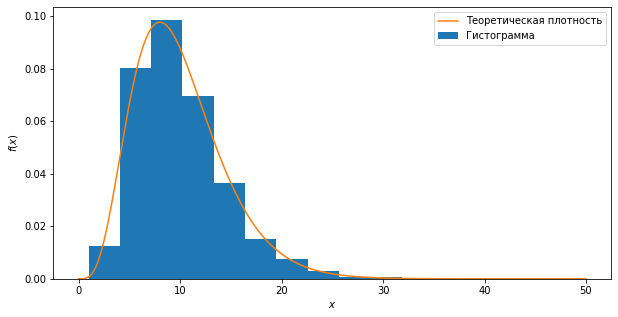

In [164]:
x_for_pdf = np.linspace(0,50,1000) # 1000 значений наа интервале [0,50]

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(sample, density=True, label='Гистограмма')
ax.plot(x_for_pdf, chi2_dist.pdf(x_for_pdf), label='Теоретическая плотность')

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

# Проверка ЦПТ

Для распределения $\chi_2$ теоретические значения математического ожидания и дисперсии оказались простыми (ссылка вики в начале страницы):
* $\mathbf E X=\text{df}$ - математическое ожидание равно числу степеней свободы
* $\mathbf D X=2\text{df}$ - дисперсия равна числу степеней свободы умноженному на два

Найдем эти значения с помощью встроенной функции ```stats```, где параметр ```'mv'``` - mean, variance.

In [175]:
th_mean, th_variance = chi2_dist.stats('mv')
print(f'Среднее генеральной совокупности {th_mean}')
print(f'Дисперсия генеральной совокупности {th_variance}')

Среднее генеральной совокупности 10.0
Дисперсия генеральной совокупности 20.0


Сгенерируем 1000 выборок объемами $n_1, n_2, n_3$

In [185]:
# объемы выборок
n_sample = [5, 10, 50]
samples_means = np.zeros((1000,3))

for i in range(1000):
    for j, n in enumerate(n_sample):
        temp_sample = chi2_dist.rvs(n)
        samples_means[i, j] = temp_sample.mean()

Построим гистограммы выборочных средних, полученных по трем выборкам + нормльные распределения, которыми приближаются выборочные средние. Параметры нормального распределения по ЦПТ: 
* Математическое ожидание: $\mathbf E X=\text{df}$
* Дисперсия и СКО: $\dfrac{\mathbf D X}{n}=\dfrac{2\text{df}}{n} \rightarrow \sigma = \sqrt{\dfrac{2\text{df}}{n}}$

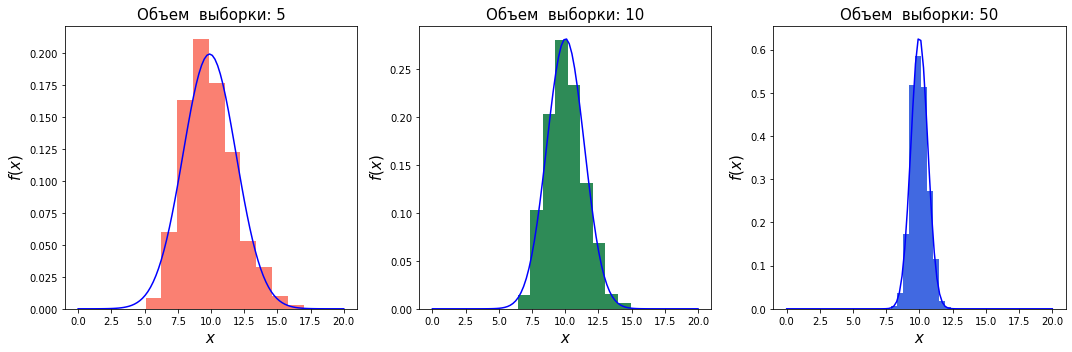

In [202]:
x_for_pdf = np.linspace(0,20,100) # 1000 значений наа интервале [0,50]

fig, ax = plt.subplots(1,3, figsize=(15,5))
colors = ['salmon', 'seagreen', 'royalblue']
# ax[0].hist(sample_means_n1, density=True, color='salmon')
# ax[1].hist(sample_means_n2, density=True, color='seagreen')
# ax[2].hist(sample_means_n3, density=True, color='royalblue')

for i, n in enumerate(n_sample):
    # гистограммы
    ax[i].hist(samples_means[:,i], density=True, color=colors[i])
    # аппроксимация нормальным распределением. используем теор. среднее + теор. дисперсию 
    norm_dist = sts.norm(th_mean, math.sqrt(th_variance/n))
    ax[i].plot(x_for_pdf, norm_dist.pdf(x_for_pdf), c='b')

    ax[i].set_ylabel('$f(x)$', fontsize=15)
    ax[i].set_xlabel('$x$', fontsize=15)
    ax[i].set_title('Объем  выборки: ' + str(n), fontsize=15)
fig.tight_layout()

# Выводы

Оценим полученные результаты:
1. Для маленьких выборок нааблюдается скос влево относительно истинного МО (особенно заметно при объеме = 5)
2. Можно, также, заметить, что с увеличением объема выборки, выборочные средние стремяться к теоретическому и для объема 50 как раз с ним совпадают. Это частично объясняет почему нужно использовать выборки $n>30$. Помимо прочего, это показывает увеличение точности аппроксимации распределения выборочных средних нормальным.